In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [15]:
data = pd.read_csv(r"C:\Users\rohit\ML PROJECT ON DECISION TREE ALG\ml mini demo\loan_status.csv")

In [19]:
data.head(9)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1001,1,0,0,1,0,5849,0,150,360,1,1,1
1,1002,1,1,1,1,0,4583,1508,128,360,1,0,0
2,1003,1,1,0,1,1,3000,0,66,360,1,0,1
3,1004,1,1,0,0,0,2583,2358,120,360,1,1,0
4,1005,1,1,0,1,0,6000,0,141,360,1,0,1
5,1006,1,0,2,1,1,5417,4196,267,360,1,1,1
6,1007,1,1,0,0,0,2333,1516,95,360,1,0,1
7,1008,1,0,0,1,0,3036,2504,158,360,0,1,0
8,1009,1,1,2,1,0,4006,1526,168,360,1,1,1


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Loan_ID            199 non-null    int64
 1   Gender             199 non-null    int64
 2   Married            199 non-null    int64
 3   Dependents         199 non-null    int64
 4   Education          199 non-null    int64
 5   Self_Employed      199 non-null    int64
 6   ApplicantIncome    199 non-null    int64
 7   CoapplicantIncome  199 non-null    int64
 8   LoanAmount         199 non-null    int64
 9   Loan_Amount_Term   199 non-null    int64
 10  Credit_History     199 non-null    int64
 11  Property_Area      199 non-null    int64
 12  Loan_Status        199 non-null    int64
dtypes: int64(13)
memory usage: 20.3 KB


In [83]:
#data = pd.read_csv("loan_status.csv")  # your own dataset

# Define X and y directly
X = data.drop("Loan_Status", axis=1)
y = data["Loan_Status"]

print("Loan dataset loaded successfully!")
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Loan dataset loaded successfully!
Features shape: (199, 12)
Target shape: (199,)


In [61]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
 clf = DecisionTreeClassifier(criterion='gini', random_state=42)
 clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [63]:
y_pred = clf.predict(X_test)

In [65]:
 print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
 print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.5

Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.40      0.38        15
           1       0.61      0.56      0.58        25

    accuracy                           0.50        40
   macro avg       0.48      0.48      0.48        40
weighted avg       0.51      0.50      0.51        40



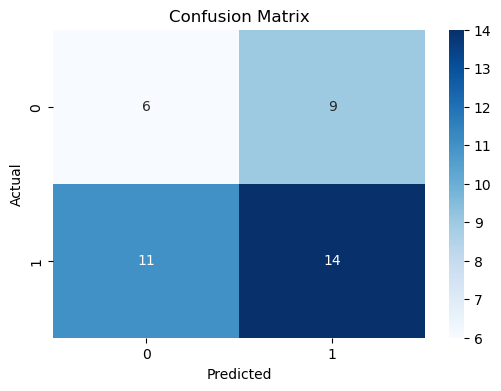

In [67]:
 #Plot Confusion Matrix
 plt.figure(figsize=(6,4))
 sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
 plt.title("Confusion Matrix")
 plt.xlabel("Predicted")
 plt.ylabel("Actual")
 plt.show()

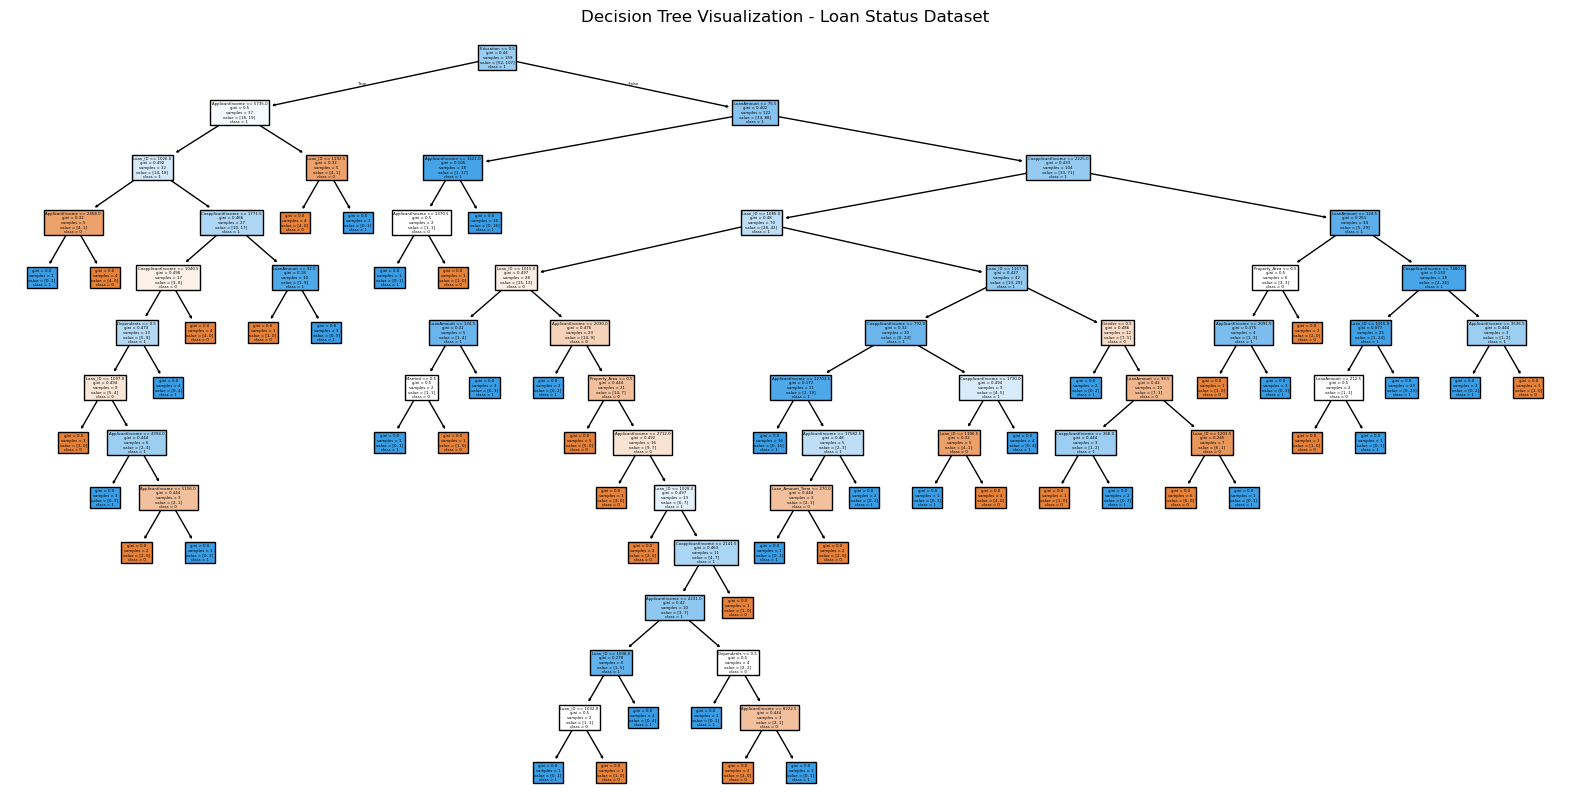

In [73]:
plt.figure(figsize=(20, 10))

# Use column names from X and class names from y
plot_tree(clf,filled=True,feature_names=X.columns,class_names=[str(cls) for cls in set(y)] )

plt.title("Decision Tree Visualization - Loan Status Dataset")
plt.show()

In [81]:


# Encode the target (if not already done)
le = LabelEncoder()
y = le.fit_transform(data['Loan_Status'])

# Train the classifier
clf.fit(X, y)

# Create a sample
sample = np.mean(X, axis=0).values.reshape(1, -1)

# Predict
predicted_class = clf.predict(sample)

# Get label name using the encoder
print(f"\nPredicted class for the new sample: {le.inverse_transform(predicted_class)[0]}")


Predicted class for the new sample: 1
